In [43]:
import helpers
from helpers import *

### W5 O(log n)

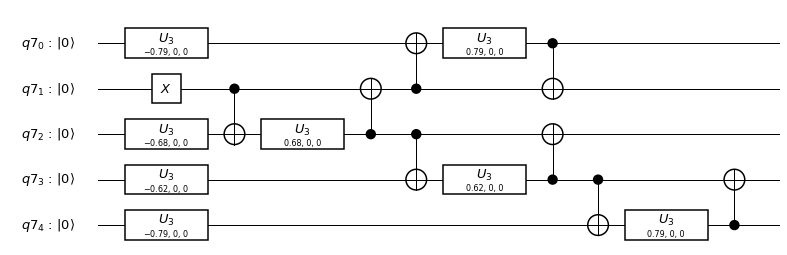

In [37]:
qreg = QuantumRegister(5)
w5 = QuantumCircuit(qreg)
w5.x(qreg[1])
Bdirect(w5, qreg, 2, 1, 2/5)
Bdirect(w5, qreg, 0, 1, 0.5)
Bdirect(w5, qreg, 3, 2, 1/3)
Bdirect(w5, qreg, 4, 3, 0.5)
job = qiskit.execute(w5, Aer.get_backend('statevector_simulator'))
theorical_psi = job.result().get_statevector(w5)
w5.draw(output='mpl')

In [38]:
tomo_circuits = state_tomography_circuits(w5, qreg)

In [ ]:
# job = qiskit.execute(tomo_circuits, least_busy, shots=1000)
jobs = []
queue_counter = 0
circuits_pool = split_list(tomo_circuits, math.ceil(len(tomo_circuits)/27))
for circuits_list in circuits_pool:
    job = qiskit.execute(circuits_list, melbourne, shots=1000, max_credits=3)
    queue_counter += 1
    job_monitor(job, monitor_async = True)
    jobs.append(job)
    while queue_counter >= 5:
        time.sleep(1)
        queue_counter = 0
        for job in jobs:
            if job.status() in [JobStatus.INITIALIZING, JobStatus.VALIDATING, JobStatus.QUEUED, JobStatus.RUNNING]:
                queue_counter  += 1

calib_circuit, state_labels = mc.complete_meas_cal(qr=qreg)
job_cal = qiskit.execute(calib_circuit, melbourne, shots=1000, max_credits=3)

job_monitor(job_cal, monitor_async = True)

In [44]:
results = []
for job in jobs:
    results.append(copy.deepcopy(job.result()))

In [45]:
data = []
for result in results:
    data += result.results
grouped_results = results[0]
grouped_results.results = data

In [46]:
cal_results = job_cal.result()
meas_fitter = mc.CompleteMeasFitter(cal_results, state_labels)
correct_results = meas_fitter.filter.apply(grouped_results)
fitter = StateTomographyFitter(correct_results, tomo_circuits)
fitted_rho = fitter.fit()
fidelity = state_fidelity(theorical_psi, fitted_rho)
print(fidelity)

0.5908371617448459


### W5 O(n)

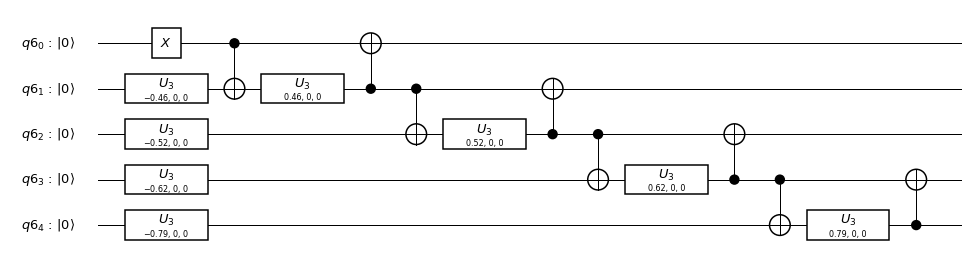

In [35]:
qreg_lin = QuantumRegister(5)
w5_lin = QuantumCircuit(qreg_lin)
w5_lin.x(qreg_lin[0])
Bdirect(w5_lin, qreg_lin, 1, 0, 1/5)
Bdirect(w5_lin, qreg_lin, 2, 1, 1/4)
Bdirect(w5_lin, qreg_lin, 3, 2, 1/3)
Bdirect(w5_lin, qreg_lin, 4, 3, 1/2)
job_lin = qiskit.execute(w5_lin, Aer.get_backend('statevector_simulator'))
theorical_psi_lin = job_lin.result().get_statevector(w5_lin)
w5_lin.draw(output='mpl')

In [ ]:
tomo_circuits_lin = state_tomography_circuits(w5_lin, qreg_lin)

In [ ]:
# job = qiskit.execute(tomo_circuits, least_busy, shots=1000)
jobs_lin = []
queue_counter = 0
circuits_pool_lin = split_list(tomo_circuits_lin, math.ceil(len(tomo_circuits_lin)/27))
for circuits_list in circuits_pool_lin:
    job_lin = qiskit.execute(circuits_list, melbourne, shots=1000)
    queue_counter += 1
    job_monitor(job_lin, monitor_async = True)
    jobs_lin.append(job_lin)
    while queue_counter >= 5:
        time.sleep(1)
        queue_counter = 0
        for job in jobs_lin:
            if job.status() in [JobStatus.INITIALIZING, JobStatus.VALIDATING, JobStatus.QUEUED, JobStatus.RUNNING]:
                queue_counter += 1

calib_circuit_lin, state_labels_lin = mc.complete_meas_cal(qr=qreg_lin)
job_cal_lin = qiskit.execute(calib_circuit_lin, melbourne, shots=1000)

job_monitor(job_cal_lin, monitor_async=True)

In [ ]:
results_lin = []
for job in jobs_lin:
    results_lin.append(copy.deepcopy(job.result()))

In [ ]:
data_lin = []
for result in results_lin:
    data_lin += result.results
grouped_results_lin = results_lin[0]
grouped_results_lin.results = data_lin

In [ ]:
cal_results_lin = job_cal_lin.result()
meas_fitter_lin = mc.CompleteMeasFitter(cal_results_lin, state_labels_lin)
correct_results_lin = meas_fitter_lin.filter.apply(grouped_results_lin)
fitter_lin = StateTomographyFitter(correct_results_lin, tomo_circuits_lin)
fitted_rho_lin = fitter_lin.fit()
fidelity_lin = state_fidelity(theorical_psi_lin, fitted_rho_lin)
print(fidelity_lin)

previsous result: 0.32